Doing transfer-function measurements often involves a lot of post-processing: time windowing to cut out reflections, filtering to remove noise and so on, moving from time to frequency domain back and forth, plotting and so on. I have written a small convenient Python module, [response](https://github.com/fhchl/Response), that makes these tasks easy by representing LTI system responses as objects of a `response.Response` class. Common DSP operations on the responses are implemented as methods that can be easily chained.
<!--TEASER_END-->

Let's first find us an impulse response to tinker around with.

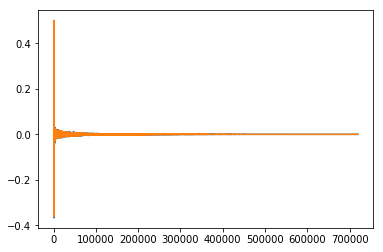

In [18]:
import soundfile as sf
import matplotlib.pyplot as plt
from urllib.request import urlretrieve

url = 'http://www.openairlib.net/sites/default/files/auralization/data/audiolab/hamilton-mausoleum/stereo/hm2_000_ortf_48k.wav'
tempfile, _ = urlretrieve(url)
x, fs = sf.read(tempfile)

plt.plot(x);

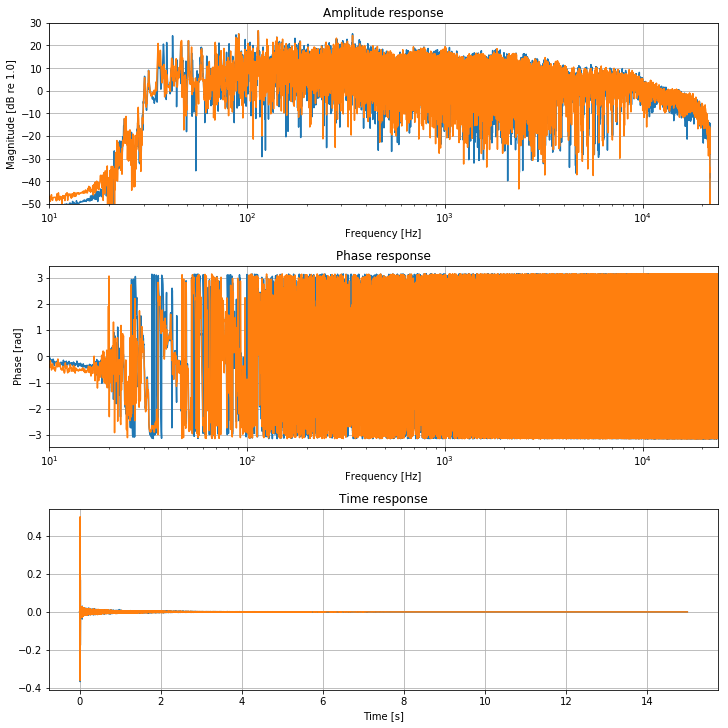

In [10]:
from response import Response

r = Response.from_time(fs, x.T)
r.plot(figsize=(10, 10), dblim=(-50, 30));

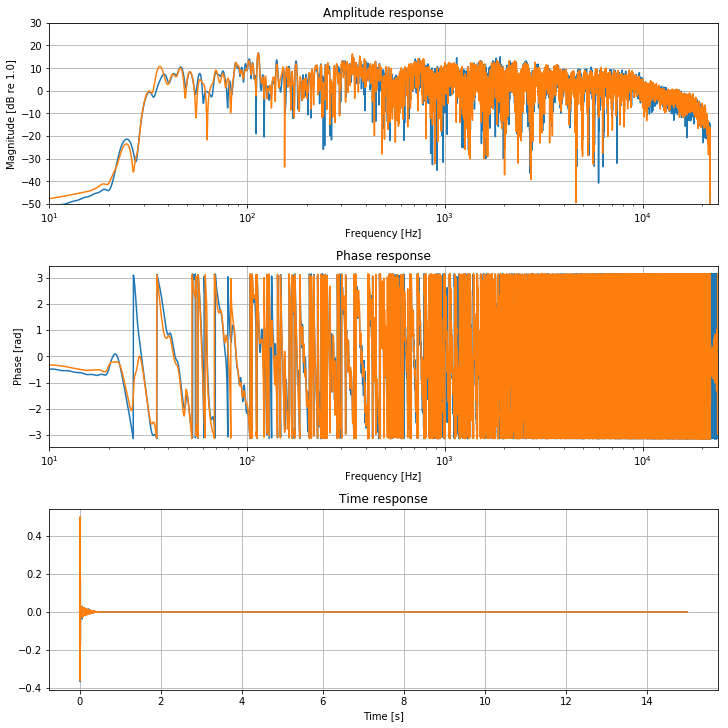

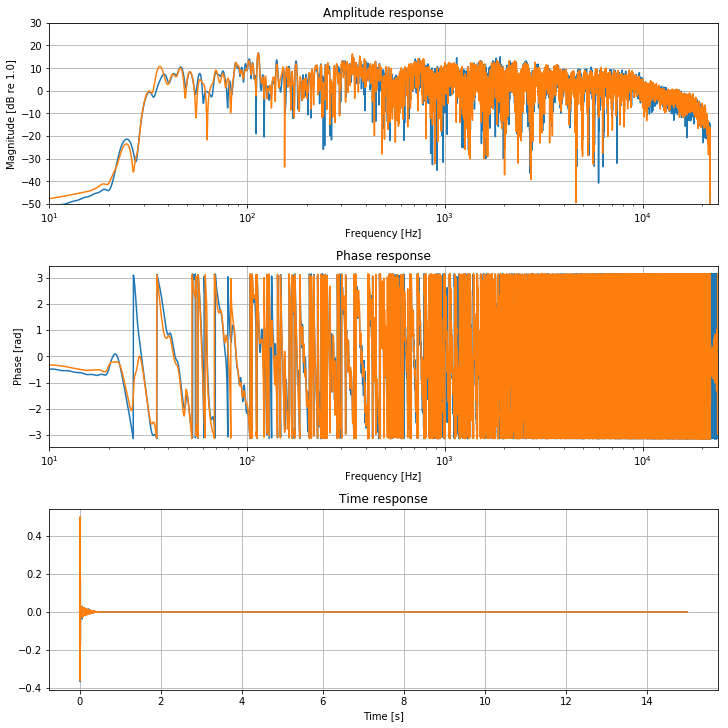

In [13]:
r = r.time_window(None, (0.1, 0.5))
r.plot(figsize=(10, 10), dblim=(-50, 30))